In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer
import numpy as np
#import pandas.rpy.common as com


%matplotlib inline

plt.style.use('bmh')
pd.options.display.float_format = '{:,.0f}'.format
pd.set_option("display.max_columns", 40)

Deal with missing data

In [33]:
df = pd.read_csv('../data/fanfics_metadata.csv')
df

,work_id,title,rating,category,fandom,relationship,character,additional tags,language,published,status,status date,words,chapters,comments,kudos,bookmarks,hits
0,3104510,Second Chances,Teen And Up Audiences,"M/M, F/F","Star Wars - All Media Types, Star Wars Prequel...","Obi-Wan Kenobi/Anakin Skywalker, Obi-Wan Kenob...","Leia Organa, Luke Skywalker, Anakin Skywalker,...","Age Regression/De-Aging, Soul Bond, The Force,...",English,2015-01-05,Completed,2016-04-16,"121,358",42/42,803,"1,917",446,"74,424"
1,6423526,hurricane on the edge of oblivion (with nowher...,Mature,Gen,Star Wars: The Wrath of Darth Maul - Ryder Win...,"Obi-Wan Kenobi & Xanatos, Qui-Gon Jinn & Feemo...","Obi-Wan Kenobi, Xanatos (Star Wars), Qui-Gon J...","minor OC's - Freeform, at least I'm pretty sur...",English,2016-04-01,Updated,2019-12-23,"144,982",24/?,744,"1,815",380,"28,728"
2,9552773,time to change the road you're on,General Audiences,Gen,"Star Wars - All Media Types, Star Wars: The Cl...","Anakin Skywalker & Ahsoka Tano, Ahsoka Tano an...","Ahsoka Tano, Anakin Skywalker, Kanan Jarrus, E...","AU, Time Travel Fix-It, possibly more of a tim...",English,2017-02-02,Completed,2017-12-27,"37,400",8/8,234,"1,446",340,"25,348"
3,5162474,Twin Sunrise,General Audiences,Gen,"Star Wars Original Trilogy, Star Wars: Rebels,...","Luke Skywalker & Darth Vader, Darth Vader & Ap...","Anakin Skywalker | Darth Vader, Luke Skywalker...","Grey Jedi, Alternate Universe, Sith Shenanigan...",English,2015-11-07,Completed,2018-01-14,"302,486",55/55,"1,003","1,418",382,"52,527"
4,4417469,On the Edge of the Devil's Backbone,Teen And Up Audiences,"F/M, Multi","Star Wars: Rebels, Star Wars - All Media Types",Kanan Jarrus/Hera Syndulla,"Hera Syndulla, Kanan Jarrus, Sabine Wren, Gara...","Alternate Universe, Canon-Typical Violence",English,2015-07-25,Completed,2018-10-20,"361,502",30/30,675,"1,395",255,"39,386"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4315,17114495,Ostateczne Poswiecenie. Nieznana historia ukry...,General Audiences,Gen,"Star Wars - All Media Types, Rogue One: A Star...",NaN,"Wilhuff Tarkin, Ahsoka Tano, Wulff Yularen",NaN,Polski,2018-12-23,Completed,2018-12-22,"5,462",2/2,nan,nan,nan,41
4316,16719585,The Life of Scoundrels,General Audiences,Gen,"Star Wars Sequel Trilogy, Star Wars Rebels",NaN,"Han Solo, Chewbacca (Star Wars), Boba Fett, Ho...","disintegrations WILL become part of your rep, ...",English,2018-11-23,Completed,2018-11-23,"5,587",12/12,nan,nan,nan,61
4317,20451119,In Night,Mature,M/M,"Star Wars: Rebels, Star Wars:KANAN",Janus Kasmir/Caleb Dume,"Caleb Dume, Janus Kasmir",NaN,Ri Ben Yu,2019-08-30,Completed,2019-08-30,"5,424",1/1,nan,nan,nan,15
4318,17136161,"""I am my prayer to you""",General Audiences,F/M,Star Wars: Rebels,"Garazeb ""Zeb"" Orrelios/Original Character(s)","Garazeb ""Zeb"" Orrelios, Original Characters","Romance, Religion, Lasan, Lasat, Prayer, Pilgr...",English,2018-12-24,Completed,2018-12-24,"1,842",1/1,nan,nan,nan,46


In [34]:
# Categorical Data
df['category'].fillna('No Category Specified', inplace=True)
df['relationship'].fillna('No Relationship Specified', inplace=True)
df['character'].fillna('No Character Specified', inplace=True)
df['additional tags'].fillna('No Additional Tags Specified', inplace=True)

# Continuous data
df['words'].fillna(0, inplace=True)
df['comments'].fillna(0, inplace=True)
df['kudos'].fillna(0, inplace=True)
df['bookmarks'].fillna(0, inplace=True)
df['hits'].fillna(0, inplace=True)

In [63]:
def num_chap(chapters):
    if '/' in chapters:
        first_chapter = chapters.split('/')[0]
        return int(first_chapter)
    else:
        return int(chapters)

In [71]:
#num_chap(df['chapters'])
df['num_chap'] = df['chapters'].apply(num_chap)
df['kudo_norm'] = df['kudos']/df['num_chap']
df['comment_norm'] = df['comments']/df['num_chap']
df

,work_id,title,rating,category,fandom,relationship,character,additional tags,language,published,status,status date,words,chapters,comments,kudos,bookmarks,hits,log_words,log_kudos,num_chap,kudo_norm,comment_norm
0,3104510,Second Chances,Teen And Up Audiences,"M/M, F/F","Star Wars - All Media Types, Star Wars Prequel...","Obi-Wan Kenobi/Anakin Skywalker, Obi-Wan Kenob...","Leia Organa, Luke Skywalker, Anakin Skywalker,...","Age Regression/De-Aging, Soul Bond, The Force,...",English,2015-01-05,Completed,2016-04-16,121358.000000,42/42,803.000000,1917.000000,446.000000,74424.000000,11.706500,7.558517,42,45.642857,19.119048
1,6423526,hurricane on the edge of oblivion (with nowher...,Mature,Gen,Star Wars: The Wrath of Darth Maul - Ryder Win...,"Obi-Wan Kenobi & Xanatos, Qui-Gon Jinn & Feemo...","Obi-Wan Kenobi, Xanatos (Star Wars), Qui-Gon J...","minor OC's - Freeform, at least I'm pretty sur...",English,2016-04-01,Updated,2019-12-23,144982.000000,24/?,744.000000,1815.000000,380.000000,28728.000000,11.884365,7.503841,24,75.625000,31.000000
2,9552773,time to change the road you're on,General Audiences,Gen,"Star Wars - All Media Types, Star Wars: The Cl...","Anakin Skywalker & Ahsoka Tano, Ahsoka Tano an...","Ahsoka Tano, Anakin Skywalker, Kanan Jarrus, E...","AU, Time Travel Fix-It, possibly more of a tim...",English,2017-02-02,Completed,2017-12-27,37400.000000,8/8,234.000000,1446.000000,340.000000,25348.000000,10.529426,7.276556,8,180.750000,29.250000
3,5162474,Twin Sunrise,General Audiences,Gen,"Star Wars Original Trilogy, Star Wars: Rebels,...","Luke Skywalker & Darth Vader, Darth Vader & Ap...","Anakin Skywalker | Darth Vader, Luke Skywalker...","Grey Jedi, Alternate Universe, Sith Shenanigan...",English,2015-11-07,Completed,2018-01-14,302486.000000,55/55,1003.000000,1418.000000,382.000000,52527.000000,12.619790,7.257003,55,25.781818,18.236364
4,4417469,On the Edge of the Devil's Backbone,Teen And Up Audiences,"F/M, Multi","Star Wars: Rebels, Star Wars - All Media Types",Kanan Jarrus/Hera Syndulla,"Hera Syndulla, Kanan Jarrus, Sabine Wren, Gara...","Alternate Universe, Canon-Typical Violence",English,2015-07-25,Completed,2018-10-20,361502.000000,30/30,675.000000,1395.000000,255.000000,39386.000000,12.798023,7.240650,30,46.500000,22.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4315,17114495,Ostateczne Poswiecenie. Nieznana historia ukry...,General Audiences,Gen,"Star Wars - All Media Types, Rogue One: A Star...",No Relationship Specified,"Wilhuff Tarkin, Ahsoka Tano, Wulff Yularen",No Additional Tags Specified,Polski,2018-12-23,Completed,2018-12-22,5462.000000,2/2,0.000000,0.000000,0.000000,41.000000,8.605570,-inf,2,0.000000,0.000000
4316,16719585,The Life of Scoundrels,General Audiences,Gen,"Star Wars Sequel Trilogy, Star Wars Rebels",No Relationship Specified,"Han Solo, Chewbacca (Star Wars), Boba Fett, Ho...","disintegrations WILL become part of your rep, ...",English,2018-11-23,Completed,2018-11-23,5587.000000,12/12,0.000000,0.000000,0.000000,61.000000,8.628198,-inf,12,0.000000,0.000000
4317,20451119,In Night,Mature,M/M,"Star Wars: Rebels, Star Wars:KANAN",Janus Kasmir/Caleb Dume,"Caleb Dume, Janus Kasmir",No Additional Tags Specified,Ri Ben Yu,2019-08-30,Completed,2019-08-30,5424.000000,1/1,0.000000,0.000000,0.000000,15.000000,8.598589,-inf,1,0.000000,0.000000
4318,17136161,"""I am my prayer to you""",General Audiences,F/M,Star Wars: Rebels,"Garazeb ""Zeb"" Orrelios/Original Character(s)","Garazeb ""Zeb"" Orrelios, Original Characters","Romance, Religion, Lasan, Lasat, Prayer, Pilgr...",English,2018-12-24,Completed,2018-12-24,1842.000000,1/1,0.000000,0.000000,0.000000,46.000000,7.518607,-inf,1,0.000000,0.000000


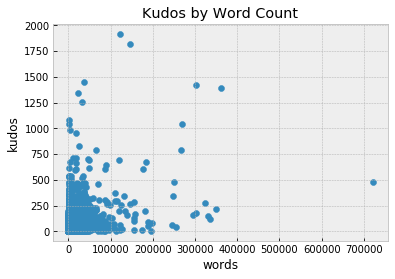

In [44]:
plt.scatter(df['words'], df.kudos)
plt.title("Kudos by Word Count")
plt.xlabel("words")
plt.ylabel("kudos")
plt.show()

/Users/rebecca/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


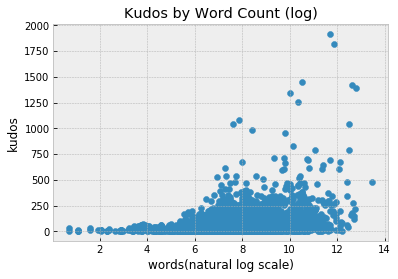

In [51]:
df['log_words'] = np.log(df['words'])
plt.scatter(df['log_words'], df.kudos)
plt.title("Kudos by Word Count (log)")
plt.xlabel("words(natural log scale)")
plt.ylabel("kudos")
plt.show()


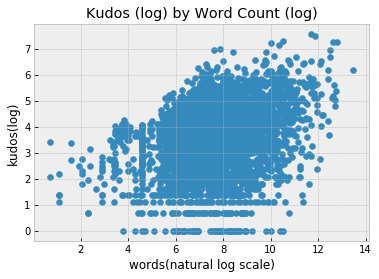

In [52]:
df['log_kudos'] = np.log(df['kudos'])
plt.scatter(df['log_words'], df['log_kudos'])
plt.title("Kudos (log) by Word Count (log)")
plt.xlabel("words(natural log scale)")
plt.ylabel("kudos(log)")
plt.show()

In [72]:
df.describe()

,work_id,words,comments,kudos,bookmarks,hits,log_words,log_kudos,num_chap,kudo_norm,comment_norm
count,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000
mean,12724031.292130,8015.578472,17.256481,68.965278,8.229398,1123.809722,-inf,-inf,3.232176,45.785118,6.378436
std,4739126.583730,25829.328250,55.725562,106.637499,20.059322,2302.147097,nan,nan,6.637788,67.458706,8.706997
min,2409431.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-inf,-inf,1.000000,0.000000,0.000000
25%,9094924.000000,886.750000,2.000000,18.000000,1.000000,283.000000,6.787563,2.890372,1.000000,9.000000,1.000000
50%,13074523.500000,2015.000000,6.000000,40.000000,3.000000,608.000000,7.608374,3.688879,1.000000,26.000000,4.000000
75%,16178795.000000,5349.250000,13.000000,81.000000,8.000000,1258.000000,8.584712,4.394449,2.000000,56.000000,8.000000
max,22009057.000000,720618.000000,1081.000000,1917.000000,446.000000,74424.000000,13.487864,7.558517,111.000000,1340.000000,212.000000


In [76]:
pd.set_option('float_format', '{:f}'.format)
df.corr()
#df[['comments', 'comment_norm', 'kudos', 'kudo_norm', 'bookmarks', 'hits']].corr()

,work_id,words,comments,kudos,bookmarks,hits,log_words,log_kudos,num_chap,kudo_norm,comment_norm
work_id,1.000000,0.007685,-0.052150,-0.259865,-0.196678,-0.234477,-0.028836,-0.360751,0.003368,-0.279674,-0.142900
words,0.007685,1.000000,0.637745,0.348219,0.332218,0.478097,0.536839,0.208237,0.753418,-0.091245,0.040436
comments,-0.052150,0.637745,1.000000,0.621827,0.594011,0.678457,0.394529,0.362481,0.586448,0.039149,0.312044
kudos,-0.259865,0.348219,0.621827,1.000000,0.901158,0.844486,0.315498,0.678484,0.290461,0.601119,0.535759
bookmarks,-0.196678,0.332218,0.594011,0.901158,1.000000,0.821262,0.301731,0.518408,0.255279,0.445059,0.419532
hits,-0.234477,0.478097,0.678457,0.844486,0.821262,1.000000,0.346474,0.488246,0.415102,0.270669,0.297139
log_words,-0.028836,0.536839,0.394529,0.315498,0.301731,0.346474,1.000000,0.314936,0.552148,-0.026757,0.119996
log_kudos,-0.360751,0.208237,0.362481,0.678484,0.518408,0.488246,0.314936,1.000000,0.207235,0.570064,0.510716
num_chap,0.003368,0.753418,0.586448,0.290461,0.255279,0.415102,0.552148,0.207235,1.000000,-0.176513,-0.058145
kudo_norm,-0.279674,-0.091245,0.039149,0.601119,0.445059,0.270669,-0.026757,0.570064,-0.176513,1.000000,0.672287


In [60]:
df.cov()

/Users/rebecca/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2449: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


,work_id,words,comments,kudos,bookmarks,hits,log_words,log_kudos
work_id,22459320776617.597656,940652763.737432,-13772243.015439,-131327858.494369,-18696957.703288,-2558186423.362322,nan,nan
words,940652763.737432,667154197.826672,917940.693228,959126.546138,172128.172895,28429021.378445,nan,nan
comments,-13772243.015439,917940.693228,3105.338231,3695.168204,663.995792,87038.143975,nan,nan
kudos,-131327858.494369,959126.546138,3695.168204,11371.556099,1927.644920,207317.268455,nan,nan
bookmarks,-18696957.703288,172128.172895,663.995792,1927.644920,402.376399,37925.462970,nan,nan
hits,-2558186423.362322,28429021.378445,87038.143975,207317.268455,37925.462970,5299881.256678,nan,nan
log_words,nan,nan,nan,nan,nan,nan,nan,nan
log_kudos,nan,nan,nan,nan,nan,nan,nan,nan


AttributeError: module 'pandas' has no attribute 'rpy'